# **Welcome to your first Bioinformatics Lab!**

Right now you are in the lab working with the transcription factor TBP. You have one week to scratch the surface of........ (fill in what methods they are doing in the lab).

The work of a real-life researcher does not end after investigating their target transcription factor for one week in the lab. Instead, many researchers relies on using bioinformatic tools to learn much more about their target.

This exercise shows what a real-life researcher might do to understand the mechanism of the transcription factor TBP even more. You will work with a real dataset from a ChIP-seq experiment investigating which sites on the humane genome TBP binds.

Throughout the exercise, you will need to (fill out the requirements in terms of questions).

**Question 1:** Below you can see a figure explaining the ChIP-seq workflow. Please write an explanation for each part of the workflow. When you are done, you are ready to begin with the bioinformatics.

<center><img src="https://github.com/MolXLab/MBII/blob/main/ChIP-seq%20vis.png?raw=true" width="1000"> <center>

# **How to run a Jupyter Notebook**

> 🟧 Jupyter Notebooks
>
> This interface is called *Jupyter Notebook* (from now on notebook).
In this case, it is served within the free tool *Google Collab*. Inside this notebook you can write code and text, which makes it perfect for sharing and reporting data analyses. It also allows to download data, insert images or install packages, all within the notebook.
You may see a panel to the right called "Release Notes". You can close this, so you only look at the notebook.

> How to use this notebook?
>
> - You can run the code in each cell by clicking on the "Run cell" sign. This sign can be found by hovering your mouse cursor over the programming cell you want to run. The sign is shaped like a Play-icon. When the code finished running, a small green check sign will appear on the top left side.
>
> - You need to run the cells in **sequential order**, please do not run a cell until the one above is finished running and do not skip any cells.
>
> - Each cell contains a short description of the code and the output you should get. Please try not to focus on understanding what each command line does, as this is not the purpose of the exercise


### **Hands-on!! First, configure our notebook!**
*   Running the cell below will install all the necessary programs that you will  be using. This might take some time, approximately 10 min (Please ignore all the messages you see when installing the various packages).

In [1]:
# Install all the necessary programs and packages
print("Installing bowtie2...")
!sudo apt -y install bowtie2 &> /dev/null
print("Installing macs3...")
!pip install macs3 &> /dev/null
print("Installing samtools...")
!sudo apt-get -qq install -y samtools &> /dev/null
print("Installing miniconda...")
!wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh -q
!bash Miniconda3-latest-Linux-x86_64.sh -b -p /content/miniconda &> /dev/null
!rm /content/Miniconda3-latest-Linux-x86_64.sh
!/content/miniconda/bin/conda config --add channels bioconda
!/content/miniconda/bin/conda config --add channels conda-forge
!/content/miniconda/bin/conda install mamba -y &> /dev/null
print("Creating conda environment...")
!/content/miniconda/bin/conda create --name myenv -y -q &> /dev/null
print("Installing bioconductor ChIP-seq packages...")
!/content/miniconda/bin/conda install -n myenv bioconductor-chipseeker bioconductor-txdb.hsapiens.ucsc.hg38.knowngene -q -y &>/dev/null
from IPython.display import Image
from IPython.display import display
print("Done!!")

Installing bowtie2...
Installing macs3...
Installing samtools...
Installing miniconda...
Creating conda environment...
Installing bioconductor ChIP-seq packages...
Done!!


## Text introducing the data analysis

rm: cannot remove 'sample_data/': No such file or directory
Cloning into 'data'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 19 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (19/19), 6.84 MiB | 2.93 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Building a SMALL index
INFO  @ 07 Oct 2024 12:05:57: [96 MB] 127605 reads have been read. 
INFO  @ 07 Oct 2024 12:05:57: [96 MB] #3 Pre-compute pvalue-qvalue table... 
INFO  @ 07 Oct 2024 12:05:58: [96 MB] #3 Call peaks for each chromosome... 
Loading data...
Plot peaks...
Done!


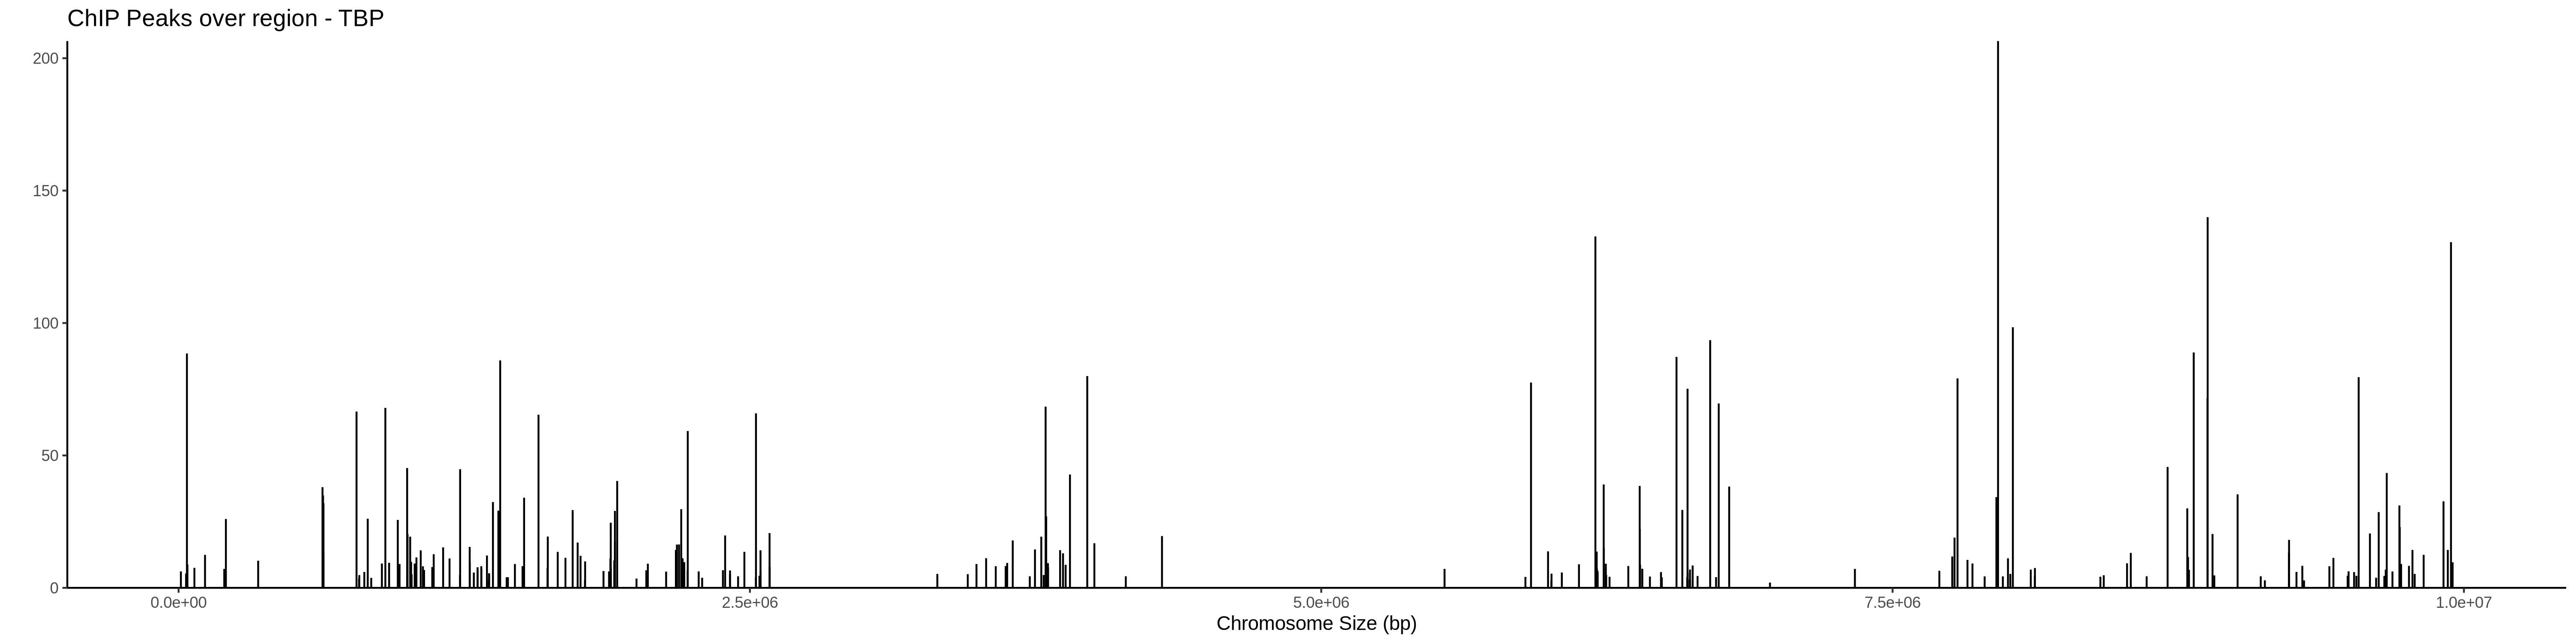

In [3]:
###-------The following code imports the data from github---#
!rm -r sample_data/
!rm -rf data
!git clone https://github.com/MolXLab/MBII.git data

###------The following code performs read alignment and organizes the results---#
# Read alignment
!mkdir -p bowtie_index
!bowtie2-build /content/data/NC_000001.11_subset.fasta bowtie_index/Chr1_index > /dev/null
!mkdir -p bowtie2_results
!bowtie2 -q --local \
-x  bowtie_index/Chr1_index \
-U /content/data/TBP_chr1_subset.fastq \
-S bowtie2_results/TBP_chr1.sam &> bowtie2_results/TBP_chr1.log

# Compress SAM output
!samtools view -q 10 -u bowtie2_results/TBP_chr1.sam | samtools sort -o bowtie2_results/TBP_chr1_sorted.bam
!samtools index bowtie2_results/TBP_chr1_sorted.bam

###------- The following code performs peak calling------###
!mkdir -p macs3_results
!macs3 callpeak -t /content/bowtie2_results/TBP_chr1_sorted.bam -f BAM -g 10000000 --outdir /content/macs3_results/ -m 1 100 -n TBP --verbose 0


###------- The following code
!/content/miniconda/envs/myenv/bin/Rscript /content/data/RScript.R

x = Image("/content/covplot_TBP.png", height=200, width=800)
display(x)

# Text with a question for the peaks

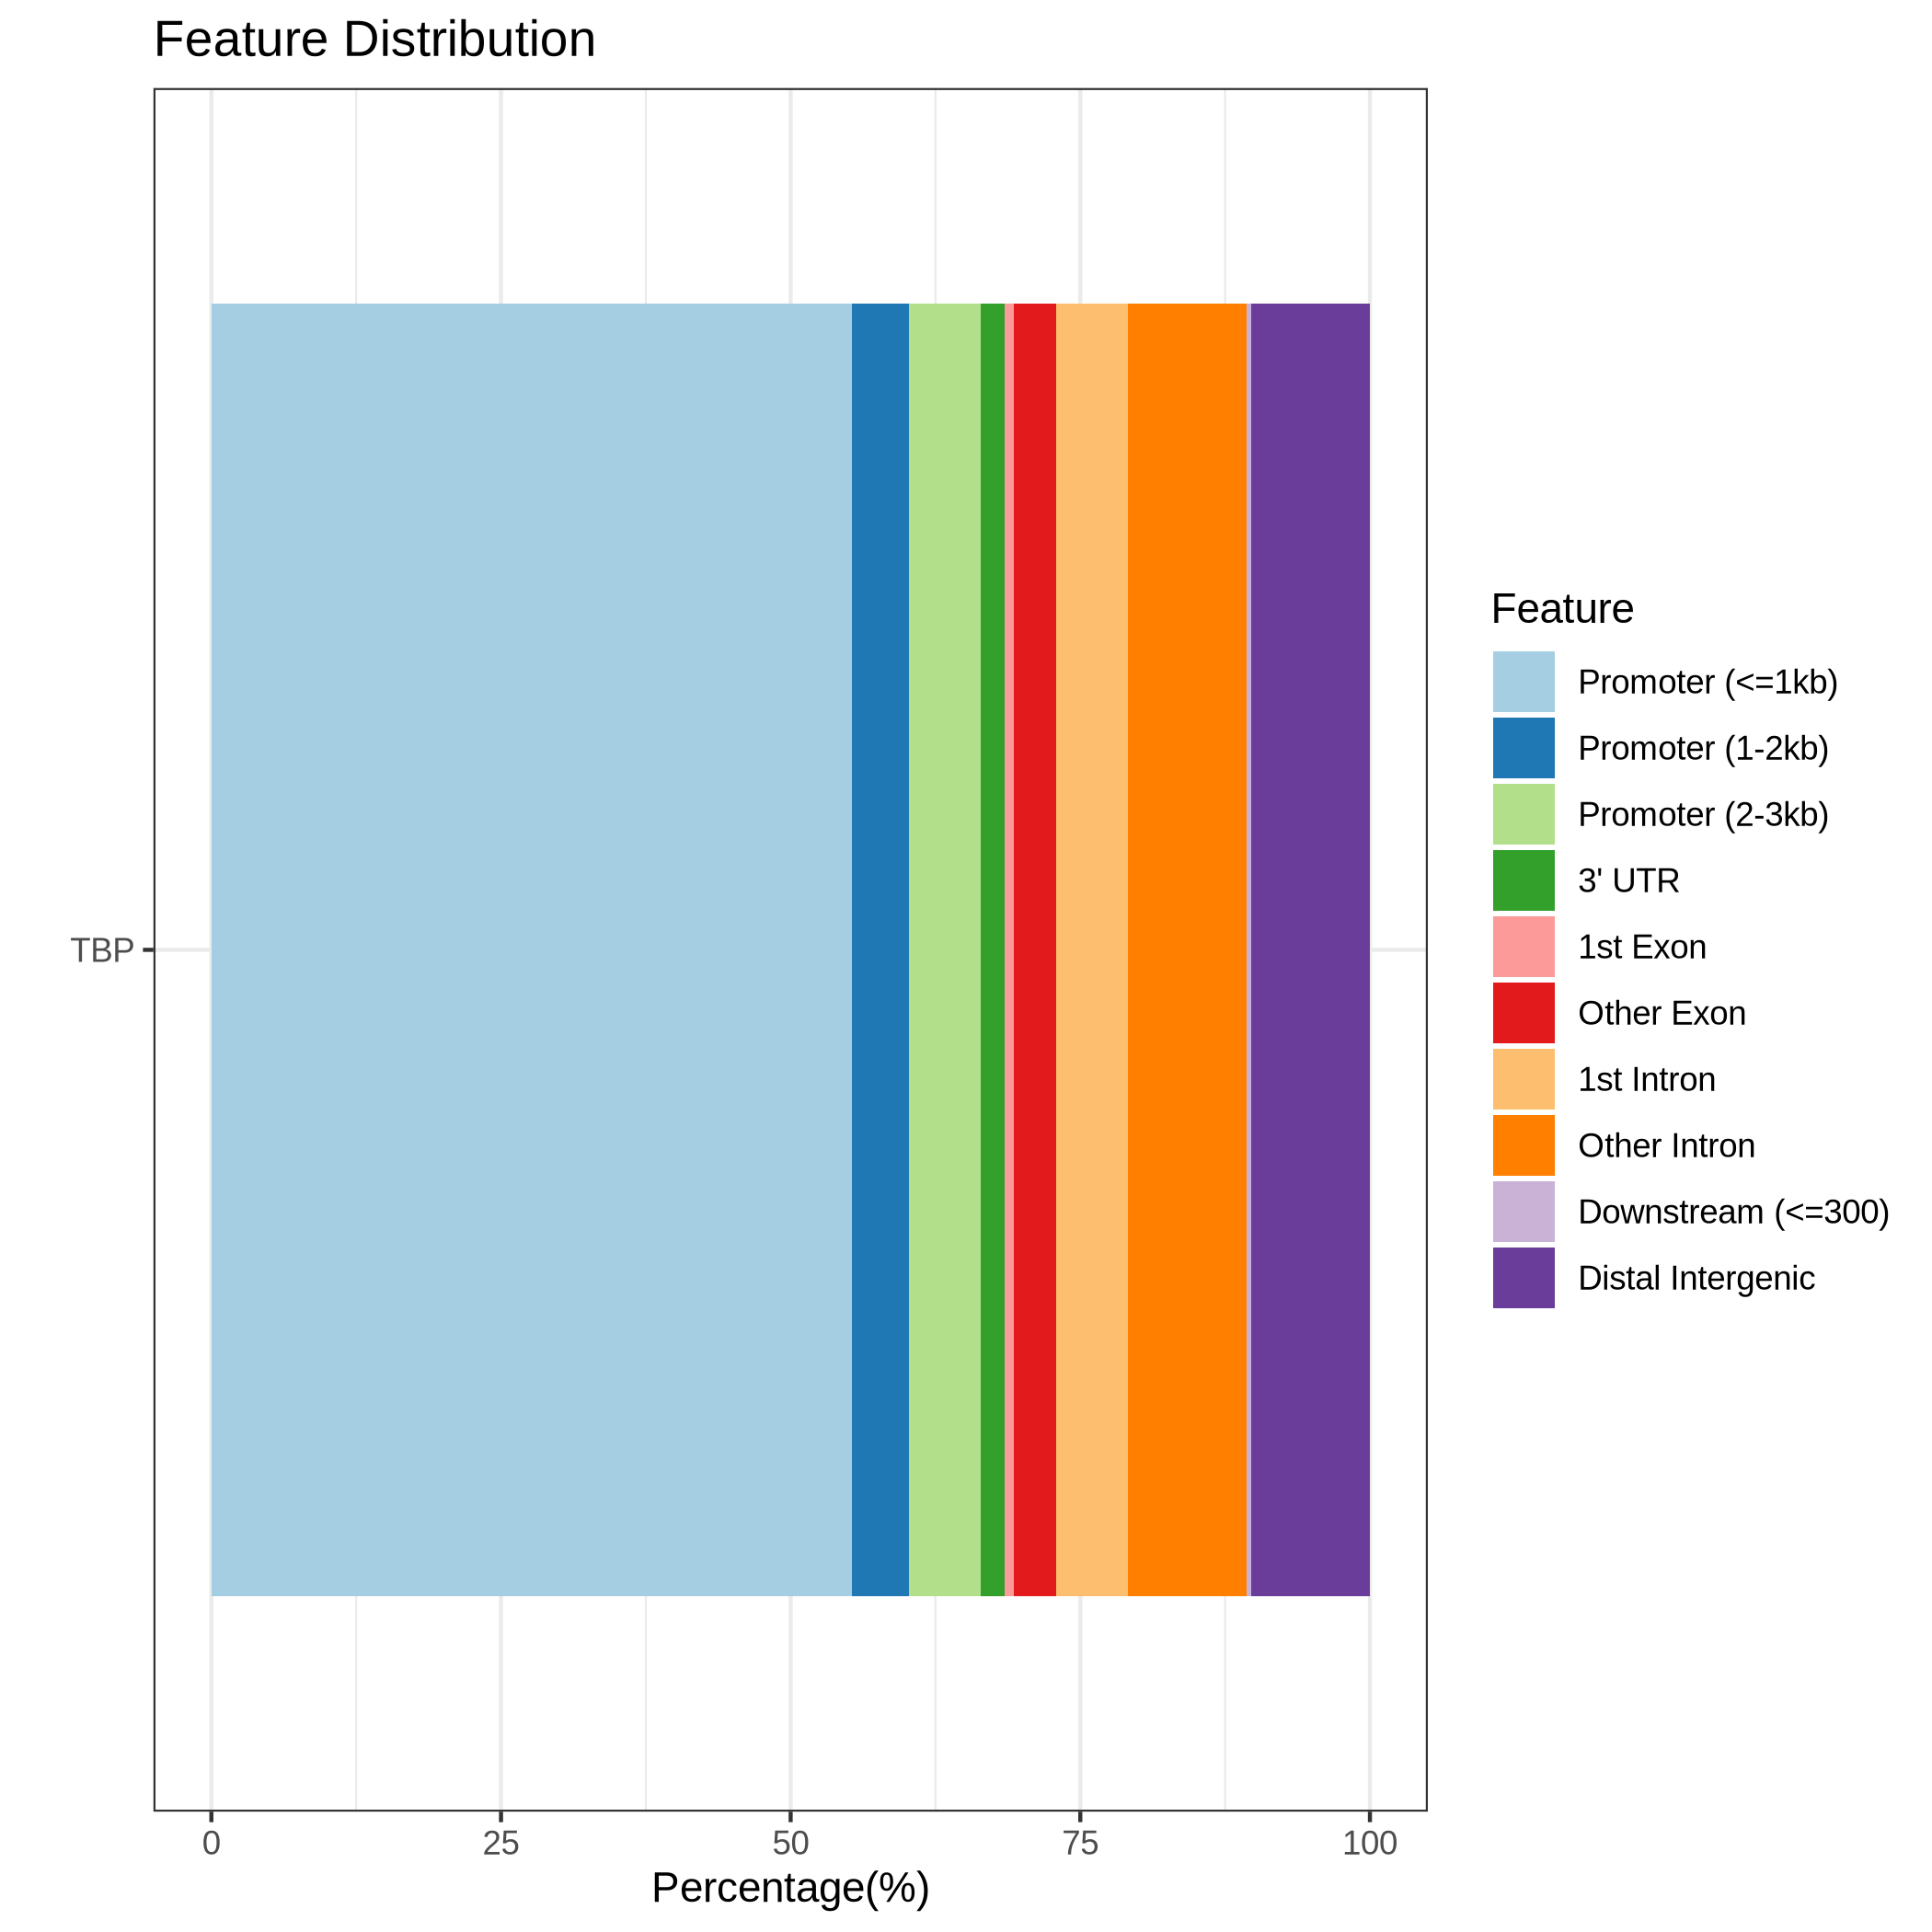

In [8]:
x= Image("/content/plotAnnoBar.png", width=700, height=700) ; display(x)

# Text with a question for the binding regions.

### **Summary**

In this notebook you have:

1. Download data from a GitHub repository
2. Align ChIP-seq reads for two different transcription factor to the Human Chromosome 1
3. Call peaks using the read coverage signal
4. Visualize the read coverage of the peaks
5. Identify the regions where the transcription factors bind to the DNA
6. Compare the genes at the binding regions between the transcription factors

🎉🎉🎉 Well done!!

Go to see Krista, when you are done! :)